In [1]:
import numpy as np

from stable_baselines3.common.env_checker import check_env
from hem.HEM_v0 import aec_env, parallel_env, sa_env, gym_env
import yaml
from hem.env.utils import Renderer
from pettingzoo.test import api_test, parallel_api_test

import supersuit as ss

In [2]:
config_path = 'hem/env/config_env.yaml'
env_config = yaml.safe_load(open(config_path, 'r', encoding='utf-8'))

env_attr = {
    'random_episode_split': False,
    'rolling_episode_split': False,
    'data_start_end': (0, 122 * 24 * 60),  # 数据集中，一共6，7，8，9月，122天，1分钟一个数据点
    'episode_time_steps': int(24 * 60 / env_config['MINUTES_PER_TIME_STEP']),  # one day, 24 hours
    'mode': 'train',
    'random_seed': 1,
    'noise_strength': 0,
    'config_path': config_path,
    'render_mode': 'None',
}

# Testing gym_env

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Episode Time: (864, 1151)
KPIs:
electrical_consumption_sum: 21.16
electrical_cost_sum: 91.96
discomfort_proportion: 0.90
discomfort_cold_proportion: 0.60
discomfort_hot_proportion: 0.30
BESS_electrical_consumption_contribution: 21.16 / 25.97, 0.19
BESS_electrical_cost_contribution: 91.96 / 112.57, 0.18
AC_control: 131 / 288, 0.45
BESS_control: 145 / 288, 0.50
washer_control: 141 / 288, 0.49
AC_reward: -15875.51
BESS_reward: 113.53
washer_reward: -4193.15


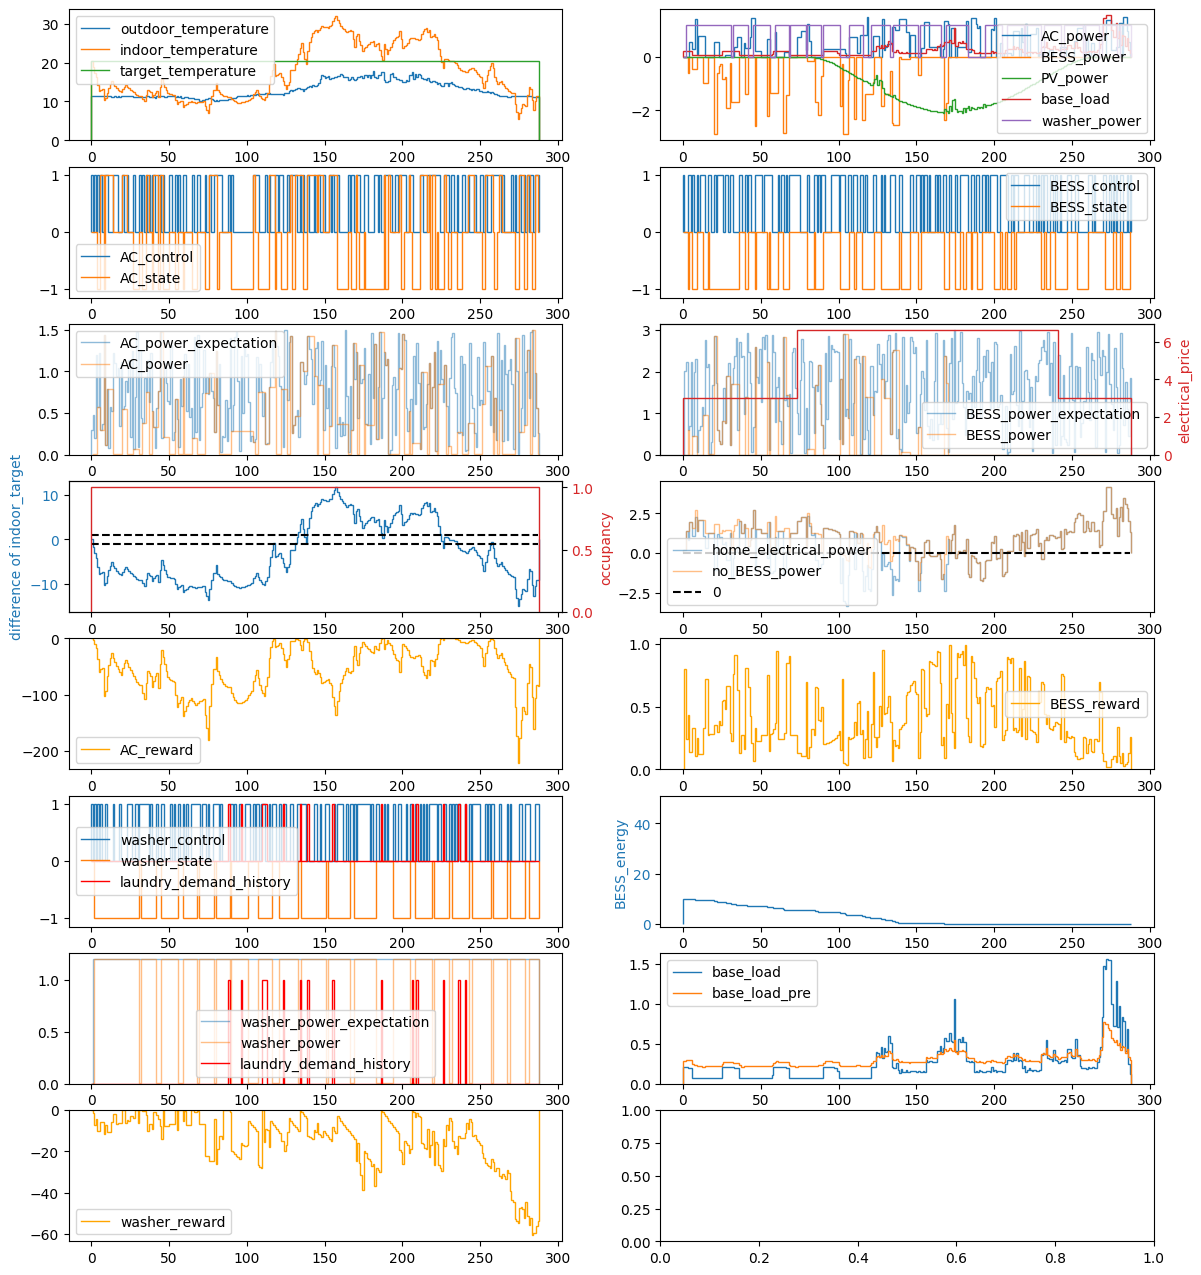

(34,) (17,)
Episode Time: (1152, 1439)
KPIs:
electrical_consumption_sum: 21.02
electrical_cost_sum: 93.31
discomfort_proportion: 0.90
discomfort_cold_proportion: 0.90
discomfort_hot_proportion: 0.00
BESS_electrical_consumption_contribution: 21.02 / 27.90, 0.25
BESS_electrical_cost_contribution: 93.31 / 122.51, 0.24
AC_control: 156 / 288, 0.54
BESS_control: 148 / 288, 0.51
washer_control: 166 / 288, 0.58
AC_reward: -10641.52
BESS_reward: 130.47
washer_reward: -11138.47


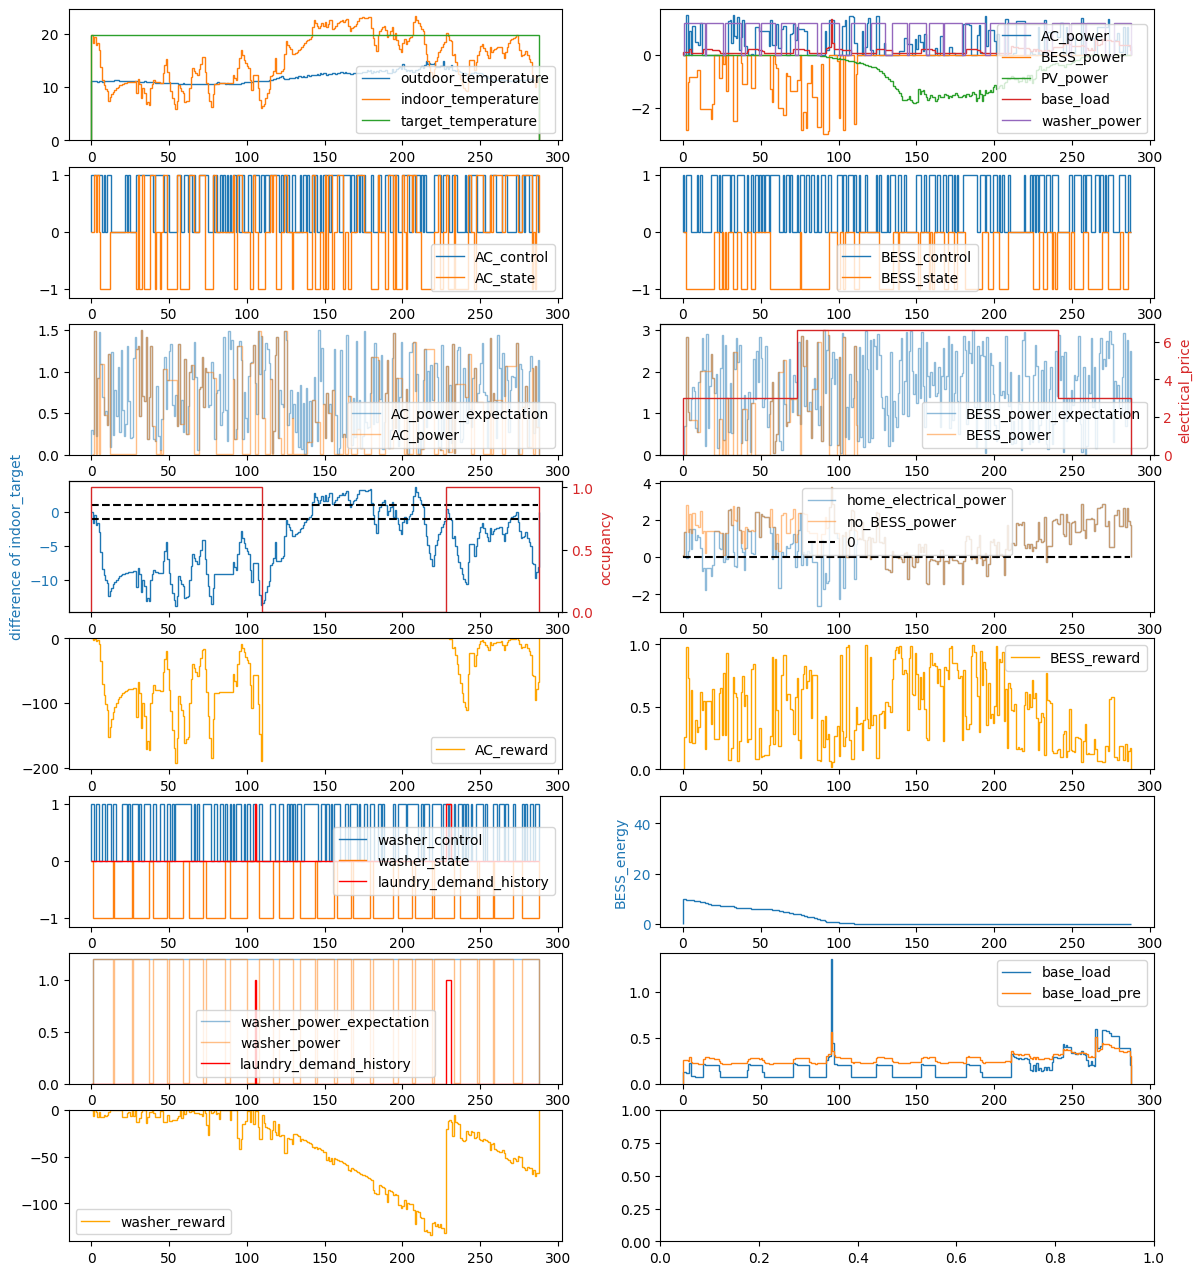

(34,) (17,)


In [3]:
env = gym_env(**env_attr)
check_env(env, warn=True)

renderer = Renderer(env=env.unwrapped, render_mode='episode')

for e in range(2):
    observation = env.reset()
    done = False
    while not done:
        actions = env.action_space.sample()
        observation, reward, termination, truncation, infos = env.step(actions)
        done = termination or truncation
        renderer.collect()
    renderer.render()
    print(observation.shape, actions.shape)
env.close()

In [4]:
env.metadata['name']

'RawGymEnv_for_HEM'

# Testing gym_vec_env

In [5]:
env = gym_env(**env_attr)
num_envs = 4
env = ss.stable_baselines3_vec_env_v0(env, num_envs=num_envs)

for e in range(2):
    observations = env.reset()
    dones = [False]
    while not any(dones):
        actions = env.action_space.sample()
        actions = np.array([actions] * num_envs)
        observations, rewards, dones, infos = env.step(actions)
    print(observation.shape, actions.shape)
env.close()

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
(34,) (4, 17)
(34,) (4, 17)


# Testing aec_env

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Starting API test
Passed API test


/opt/homebrew/anaconda3/envs/tianshou/lib/python3.11/site-packages/pettingzoo/test/api_test.py:266: UserWarning: We recommend agents to be named in the format <descriptor>_<number>, like "player_0"
  warnings.warn(


Episode Time: (2016, 2303)
KPIs:
electrical_consumption_sum: 13.74
electrical_cost_sum: 54.44
discomfort_proportion: 0.94
discomfort_cold_proportion: 0.85
discomfort_hot_proportion: 0.09
BESS_electrical_consumption_contribution: 13.74 / 21.42, 0.36
BESS_electrical_cost_contribution: 54.44 / 94.85, 0.43
AC_control: 241 / 290, 0.83
BESS_control: 244 / 290, 0.84
washer_control: 252 / 290, 0.87
AC_reward: -1185.78
BESS_reward: 41.33
washer_reward: -708.79


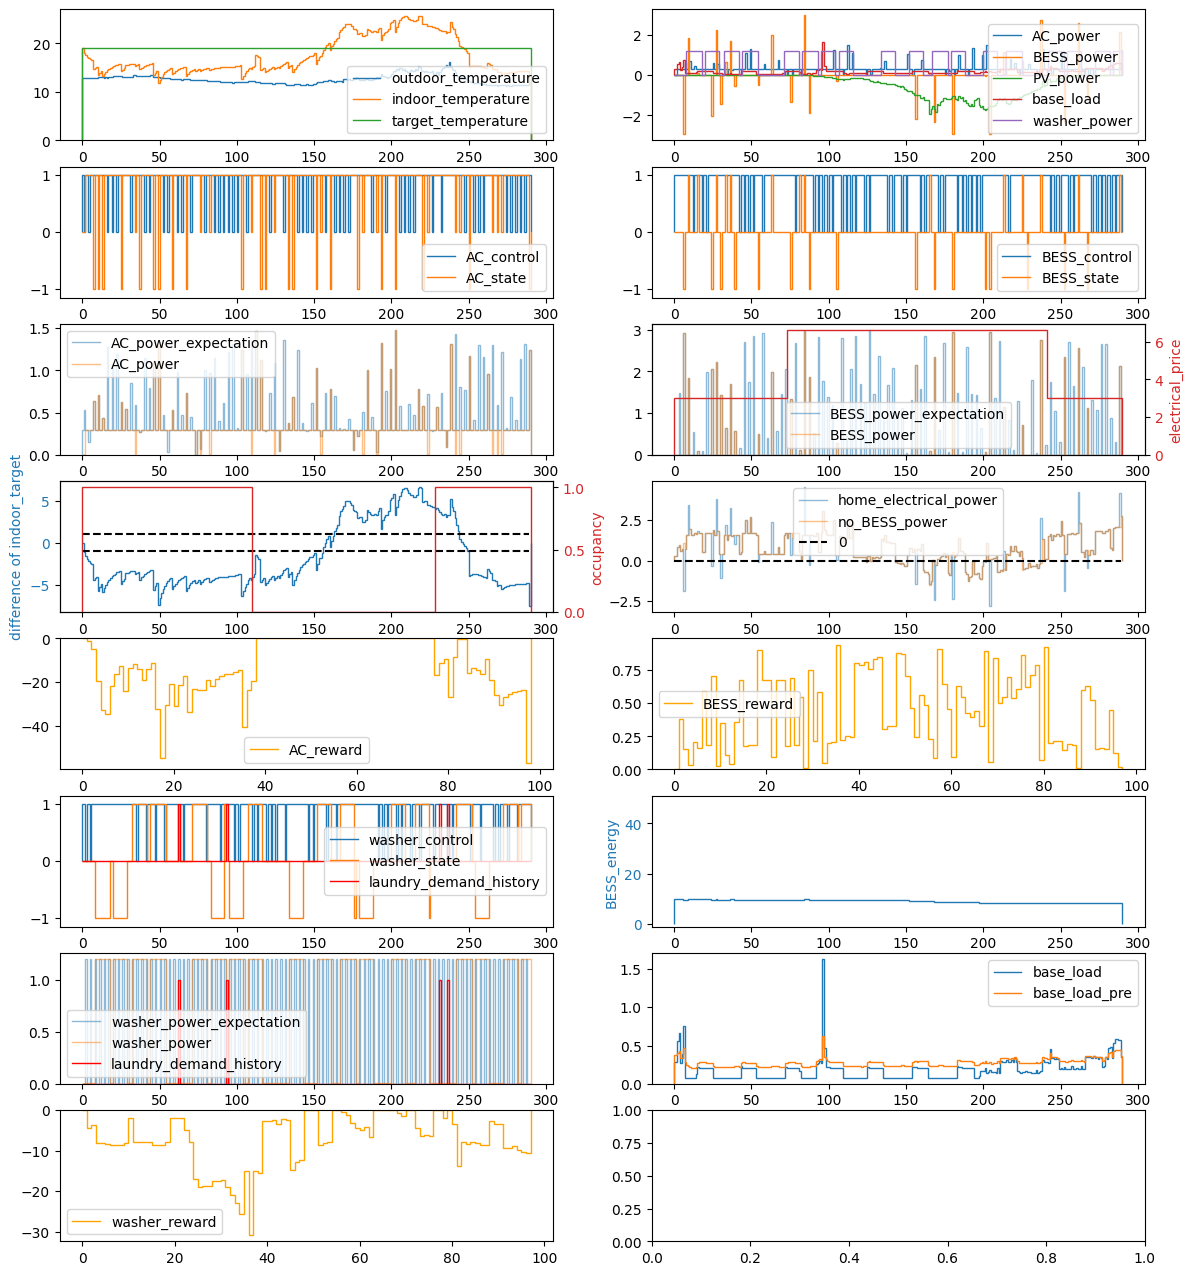

Episode Time: (2304, 2591)
KPIs:
electrical_consumption_sum: 9.03
electrical_cost_sum: 29.28
discomfort_proportion: 0.89
discomfort_cold_proportion: 0.57
discomfort_hot_proportion: 0.31
BESS_electrical_consumption_contribution: 9.03 / 16.79, 0.46
BESS_electrical_cost_contribution: 29.28 / 69.43, 0.58
AC_control: 249 / 290, 0.86
BESS_control: 247 / 290, 0.85
washer_control: 238 / 290, 0.82
AC_reward: -4515.94
BESS_reward: 38.40
washer_reward: -930.98


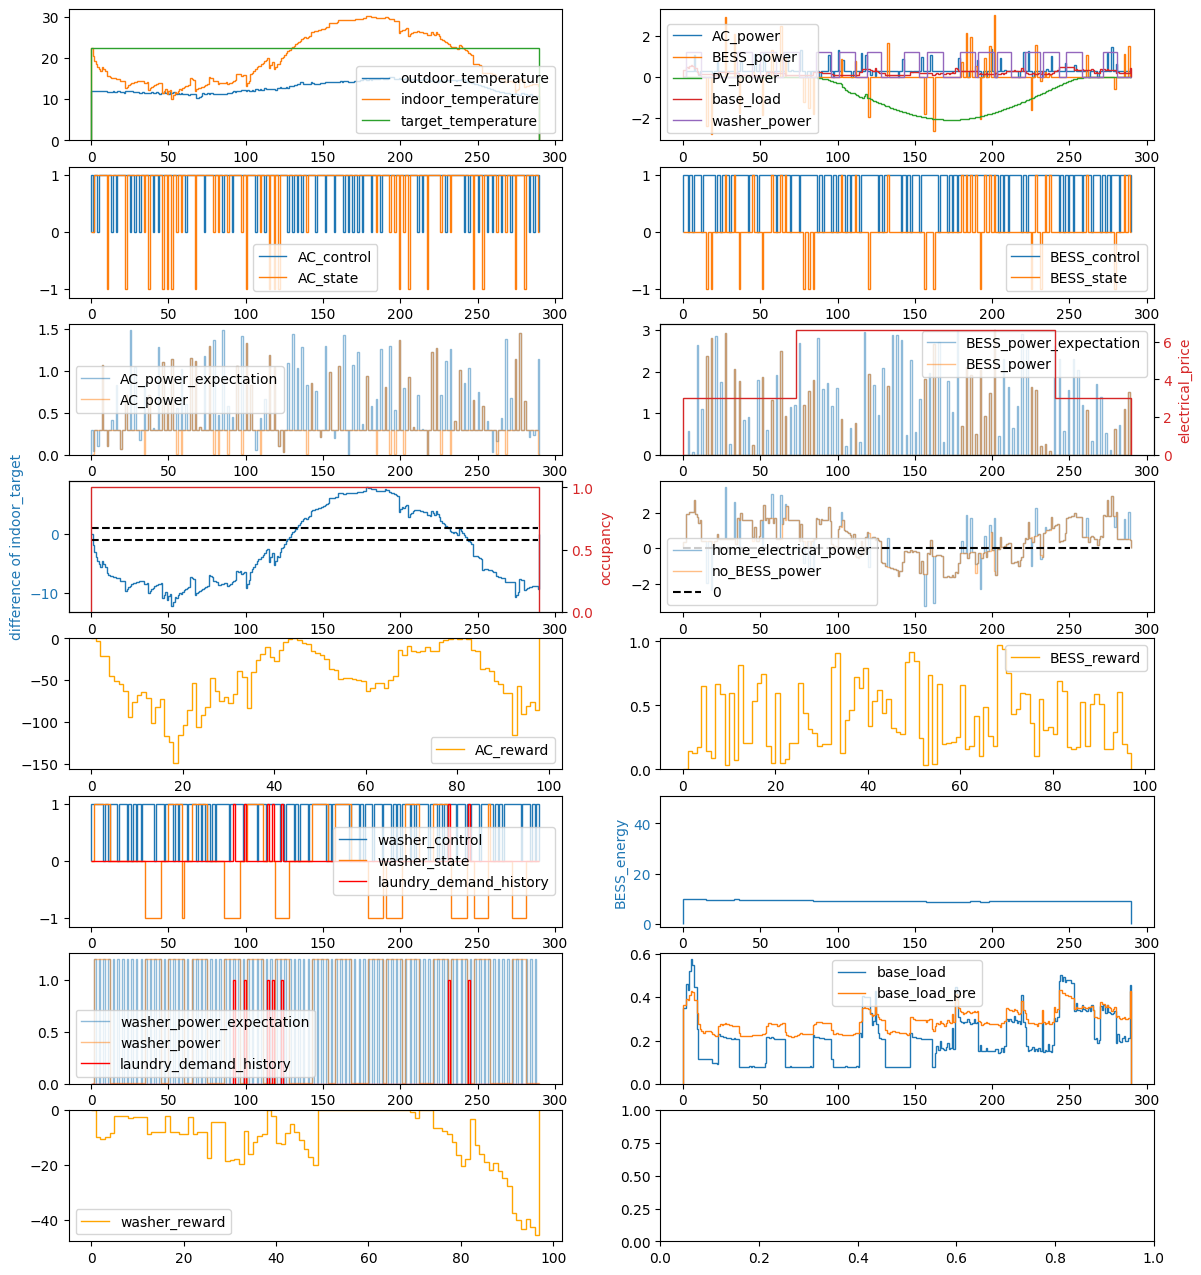

Episode Time: (2592, 2879)
KPIs:
electrical_consumption_sum: 13.55
electrical_cost_sum: 47.79
discomfort_proportion: 0.91
discomfort_cold_proportion: 0.66
discomfort_hot_proportion: 0.25
BESS_electrical_consumption_contribution: 13.55 / 21.25, 0.36
BESS_electrical_cost_contribution: 47.79 / 88.13, 0.46
AC_control: 244 / 290, 0.84
BESS_control: 241 / 290, 0.83
washer_control: 250 / 290, 0.86
AC_reward: -5988.68
BESS_reward: 38.10
washer_reward: -726.77


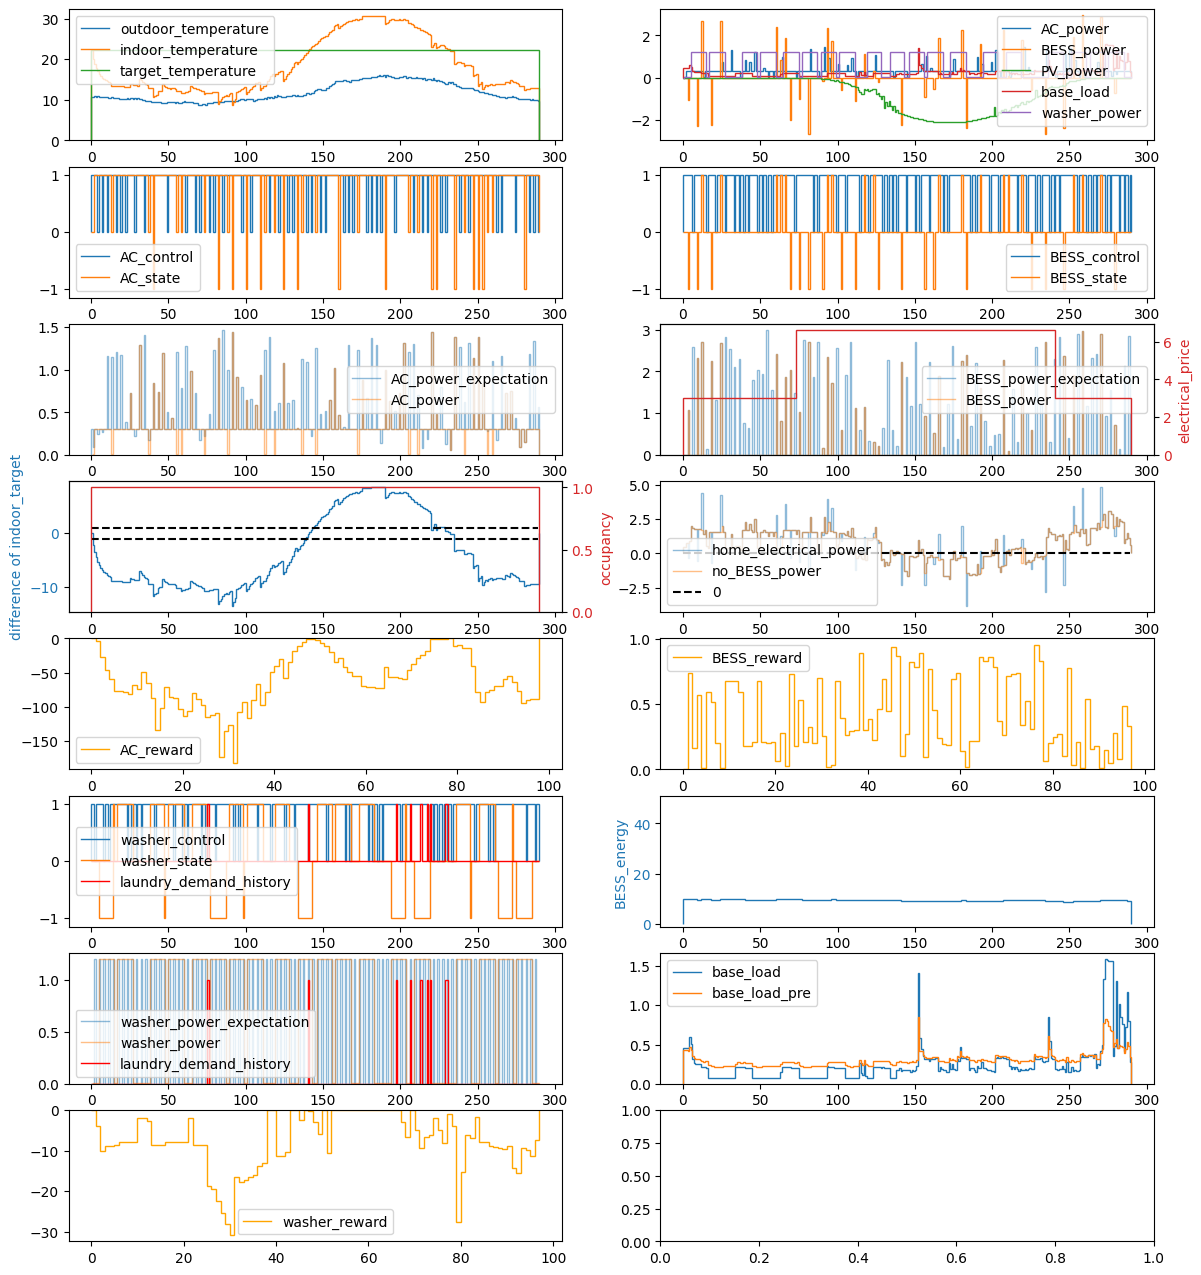

In [6]:
env = aec_env(**env_attr)
api_test(env, num_cycles=50)

renderer = Renderer(env=env.unwrapped, render_mode='episode')

for e in range(3):
    env.reset()
    for agent in env.agent_iter(max_iter=1e5):
        observation, reward, termination, truncation, infos = env.last()
        if termination or truncation:
            action = None
            break
        else:
            action = env.action_space(agent).sample()
        env.step(action)
        renderer.collect()
    renderer.render()
env.close()

# Testing parallel_env

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Passed Parallel API test
Episode Time: (864, 1151)
KPIs:
electrical_consumption_sum: 21.44
electrical_cost_sum: 90.16
discomfort_proportion: 0.86
discomfort_cold_proportion: 0.57
discomfort_hot_proportion: 0.29
BESS_electrical_consumption_contribution: 21.44 / 26.88, 0.20
BESS_electrical_cost_contribution: 90.16 / 114.92, 0.22
AC_control: 146 / 288, 0.51
BESS_control: 135 / 288, 0.47
washer_control: 141 / 288, 0.49
AC_reward: -12551.01
BESS_reward: 98.09
washer_reward: -4978.08


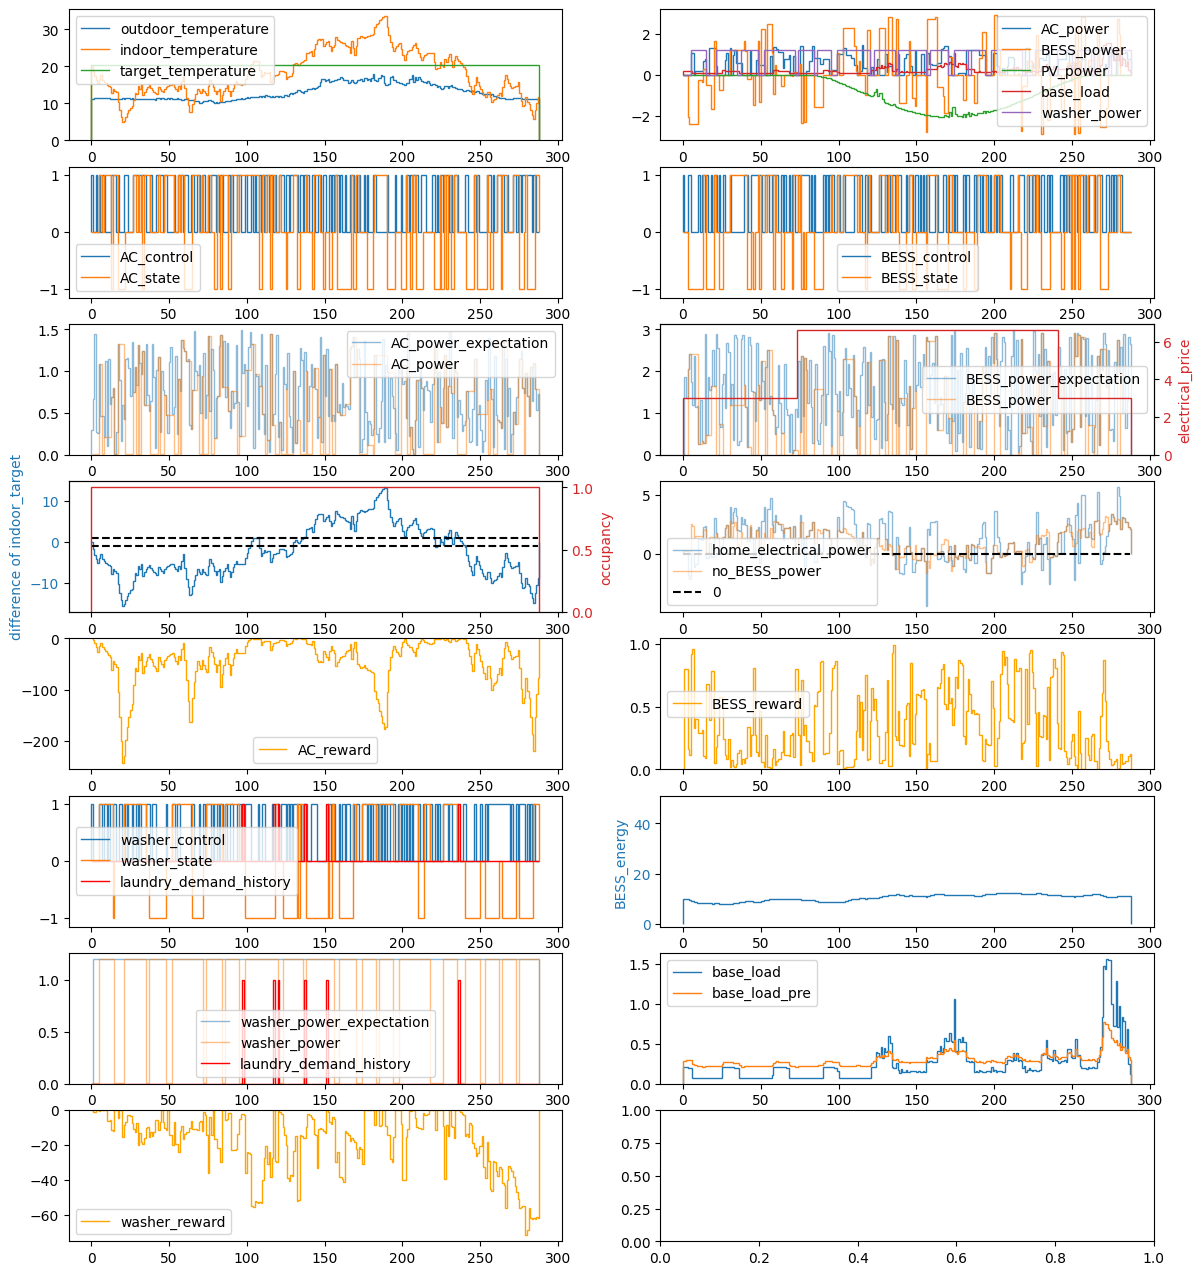

Episode Time: (1152, 1439)
KPIs:
electrical_consumption_sum: 22.54
electrical_cost_sum: 105.50
discomfort_proportion: 0.94
discomfort_cold_proportion: 0.92
discomfort_hot_proportion: 0.02
BESS_electrical_consumption_contribution: 22.54 / 28.11, 0.20
BESS_electrical_cost_contribution: 105.50 / 131.92, 0.20
AC_control: 141 / 288, 0.49
BESS_control: 163 / 288, 0.57
washer_control: 135 / 288, 0.47
AC_reward: -9499.03
BESS_reward: 92.14
washer_reward: -3887.74


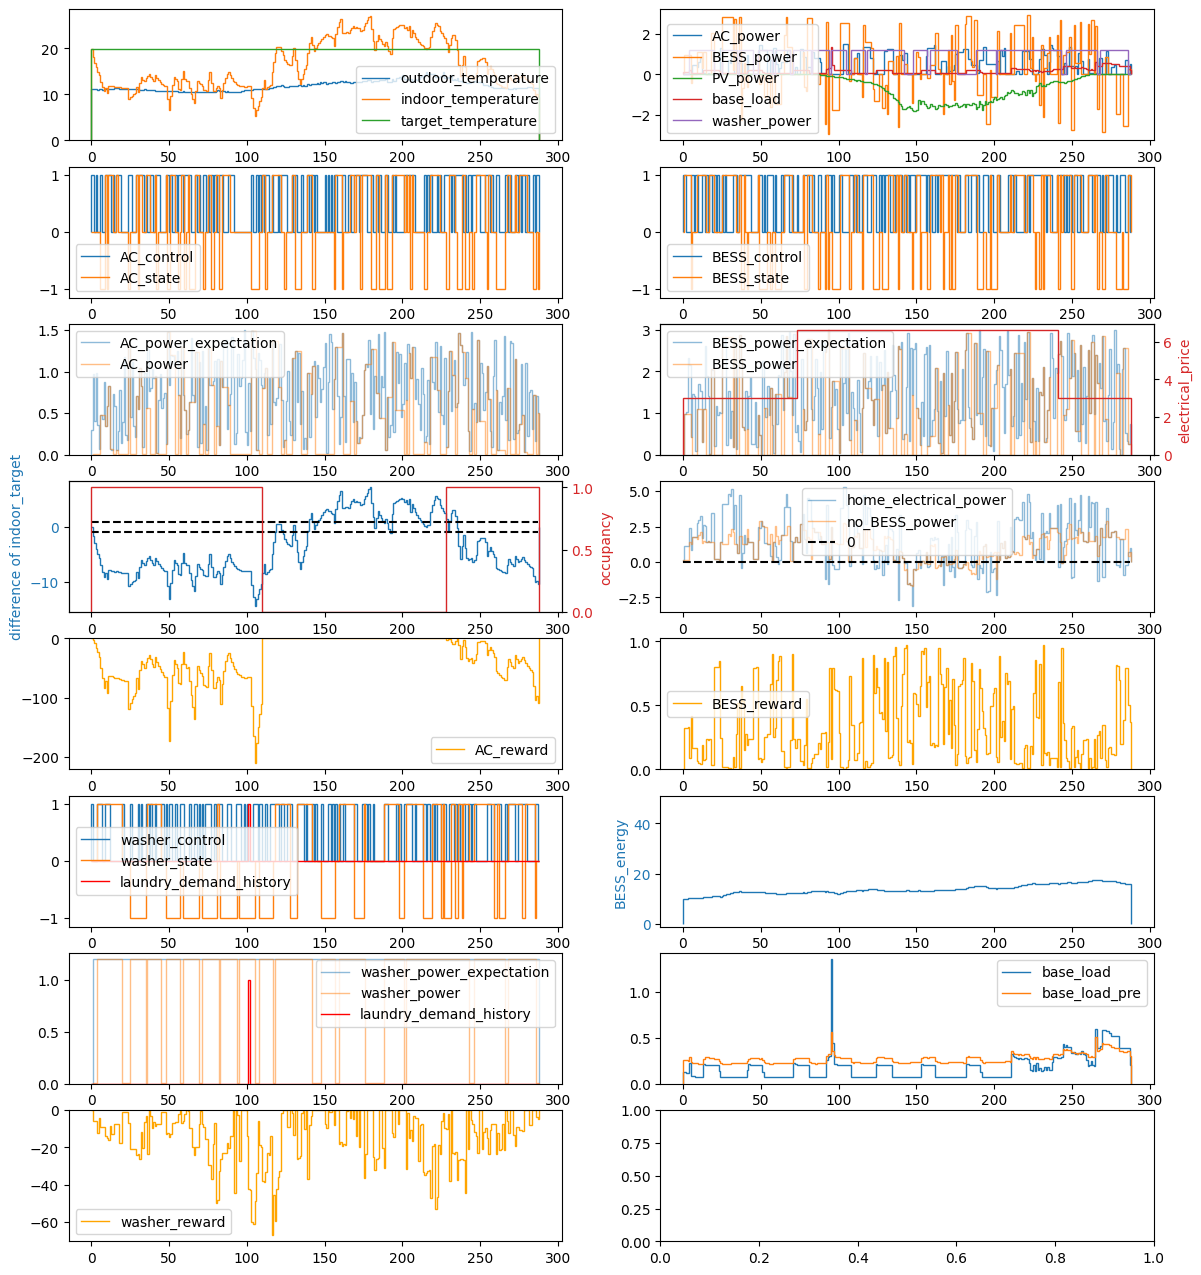

Episode Time: (1440, 1727)
KPIs:
electrical_consumption_sum: 25.68
electrical_cost_sum: 115.16
discomfort_proportion: 0.96
discomfort_cold_proportion: 0.95
discomfort_hot_proportion: 0.01
BESS_electrical_consumption_contribution: 25.68 / 28.87, 0.11
BESS_electrical_cost_contribution: 115.16 / 127.86, 0.10
AC_control: 137 / 288, 0.48
BESS_control: 155 / 288, 0.54
washer_control: 146 / 288, 0.51
AC_reward: -20027.18
BESS_reward: 94.41
washer_reward: -6854.79


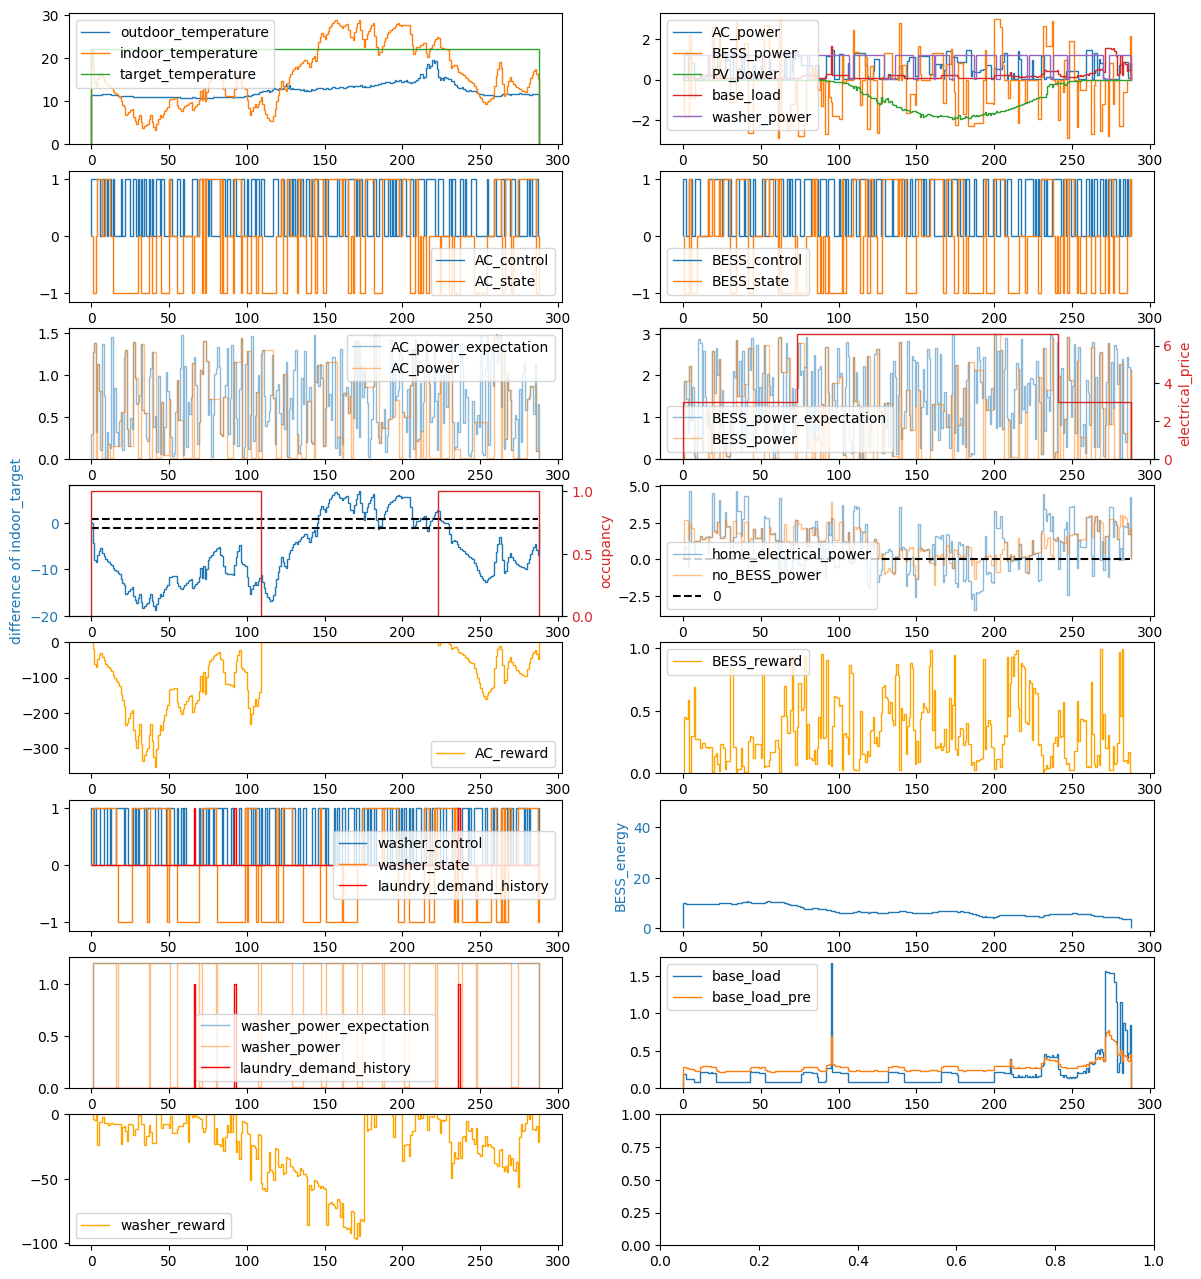

Episode Time: (1728, 2015)
KPIs:
electrical_consumption_sum: 25.82
electrical_cost_sum: 111.66
discomfort_proportion: 0.88
discomfort_cold_proportion: 0.88
discomfort_hot_proportion: 0.00
BESS_electrical_consumption_contribution: 25.82 / 27.35, 0.06
BESS_electrical_cost_contribution: 111.66 / 114.50, 0.02
AC_control: 159 / 288, 0.55
BESS_control: 136 / 288, 0.47
washer_control: 137 / 288, 0.48
AC_reward: -10388.04
BESS_reward: 96.40
washer_reward: -3047.19


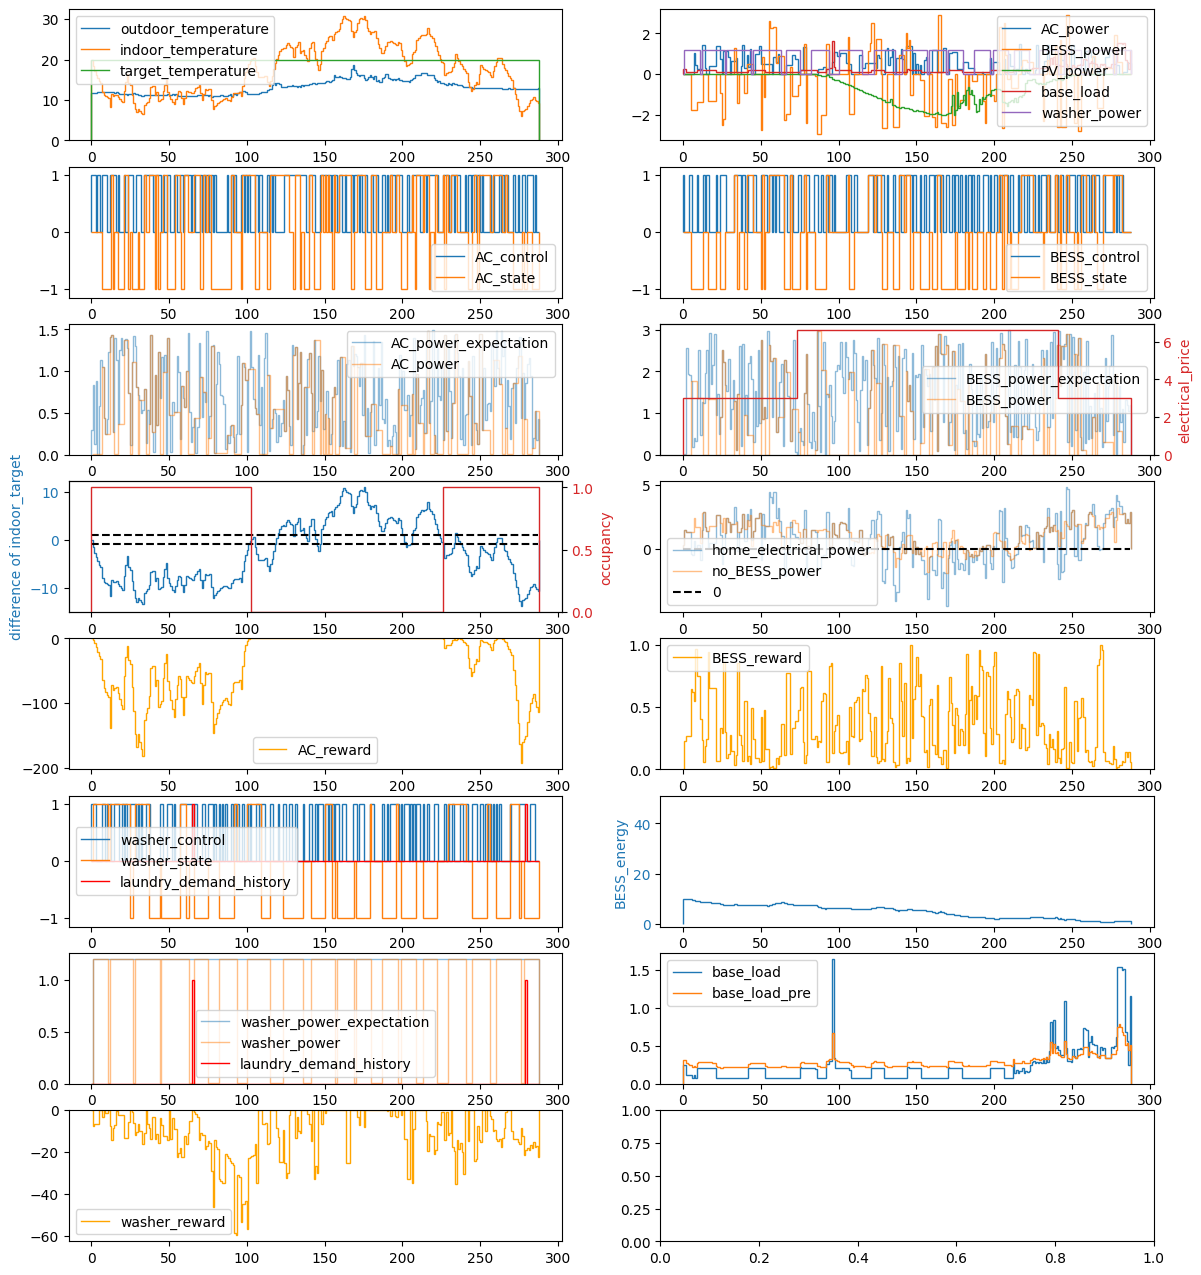

In [7]:
env = parallel_env(**env_attr)
parallel_api_test(env, num_cycles=50)

renderer = Renderer(env=env.unwrapped, render_mode='episode')

for e in range(4):
    observation, infos = env.reset()
    terminations = {agent: False for agent in env.agents}
    truncations = {agent: False for agent in env.agents}
    while not any(terminations.values()) and not any(truncations.values()):
        actions = {agent: env.action_space(agent).sample() for agent in env.agents}
        observation, rewards, terminations, truncations, infos = env.step(actions)
        renderer.collect()
    renderer.render()
env.close()

# Testing sa_env

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Passed Parallel API test
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
ac

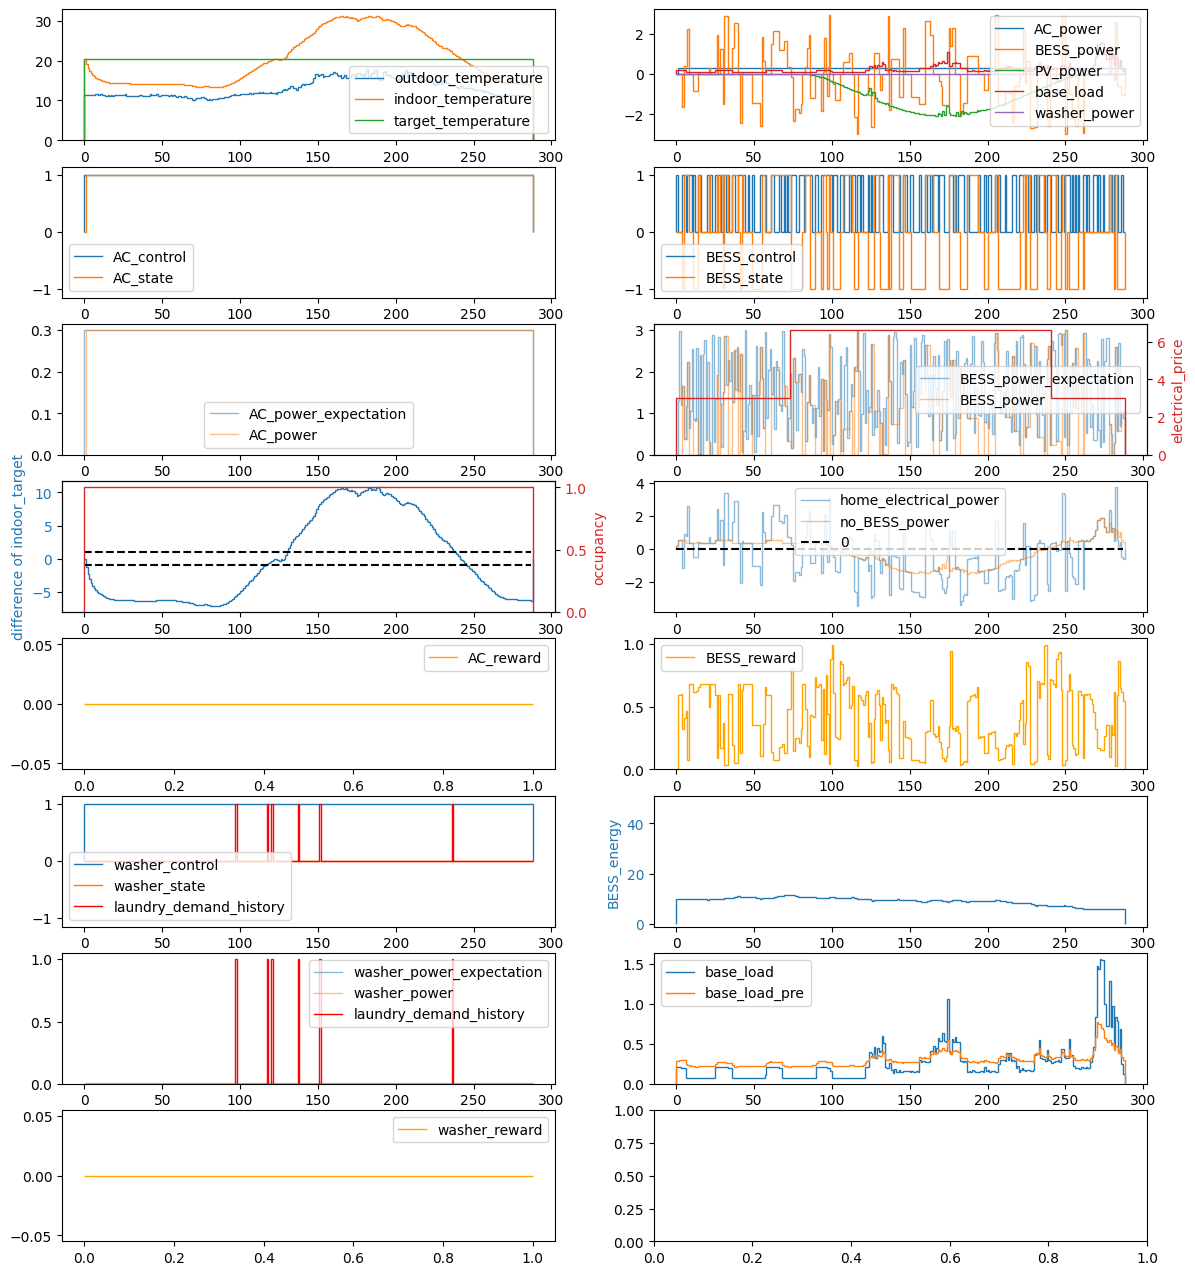

actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions


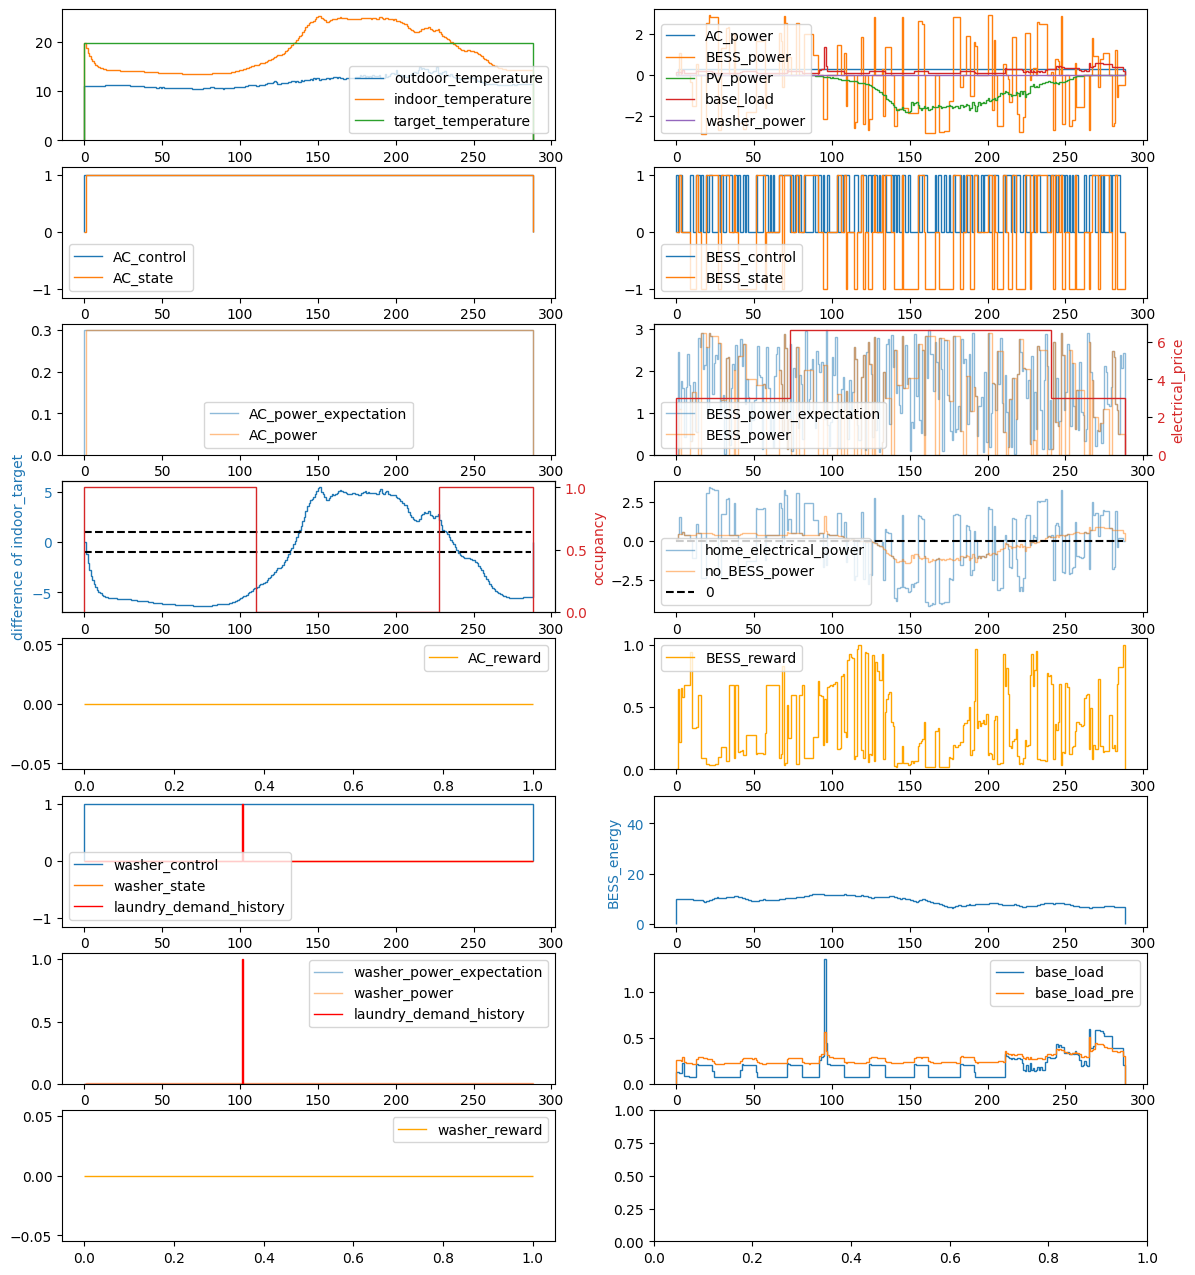

actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions


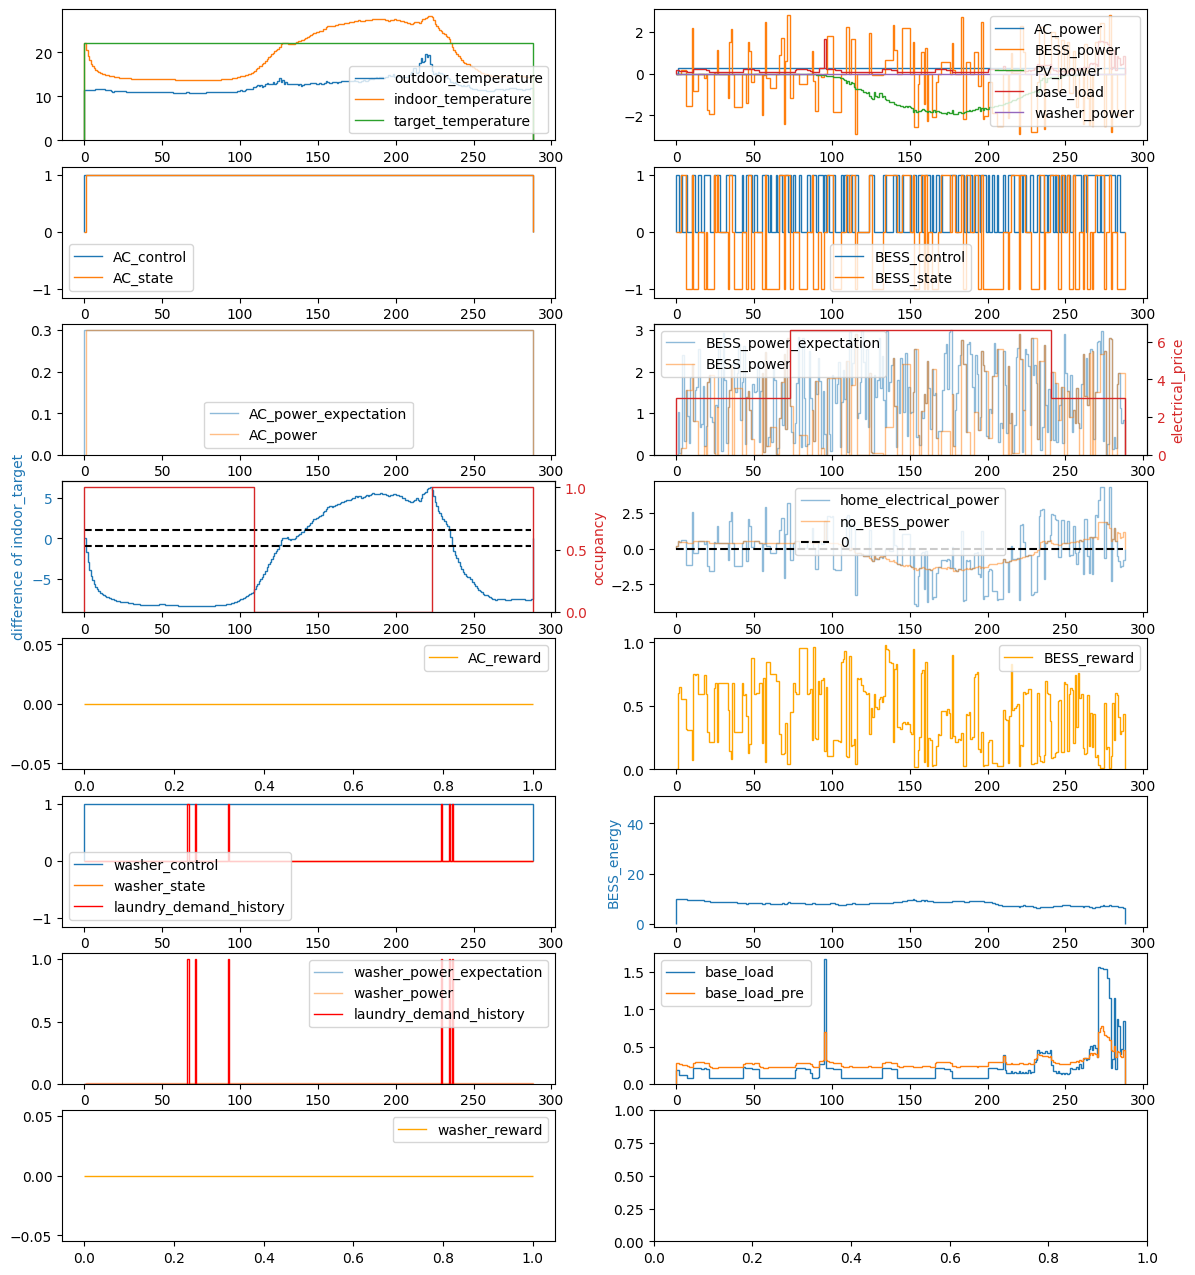

actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions
actions


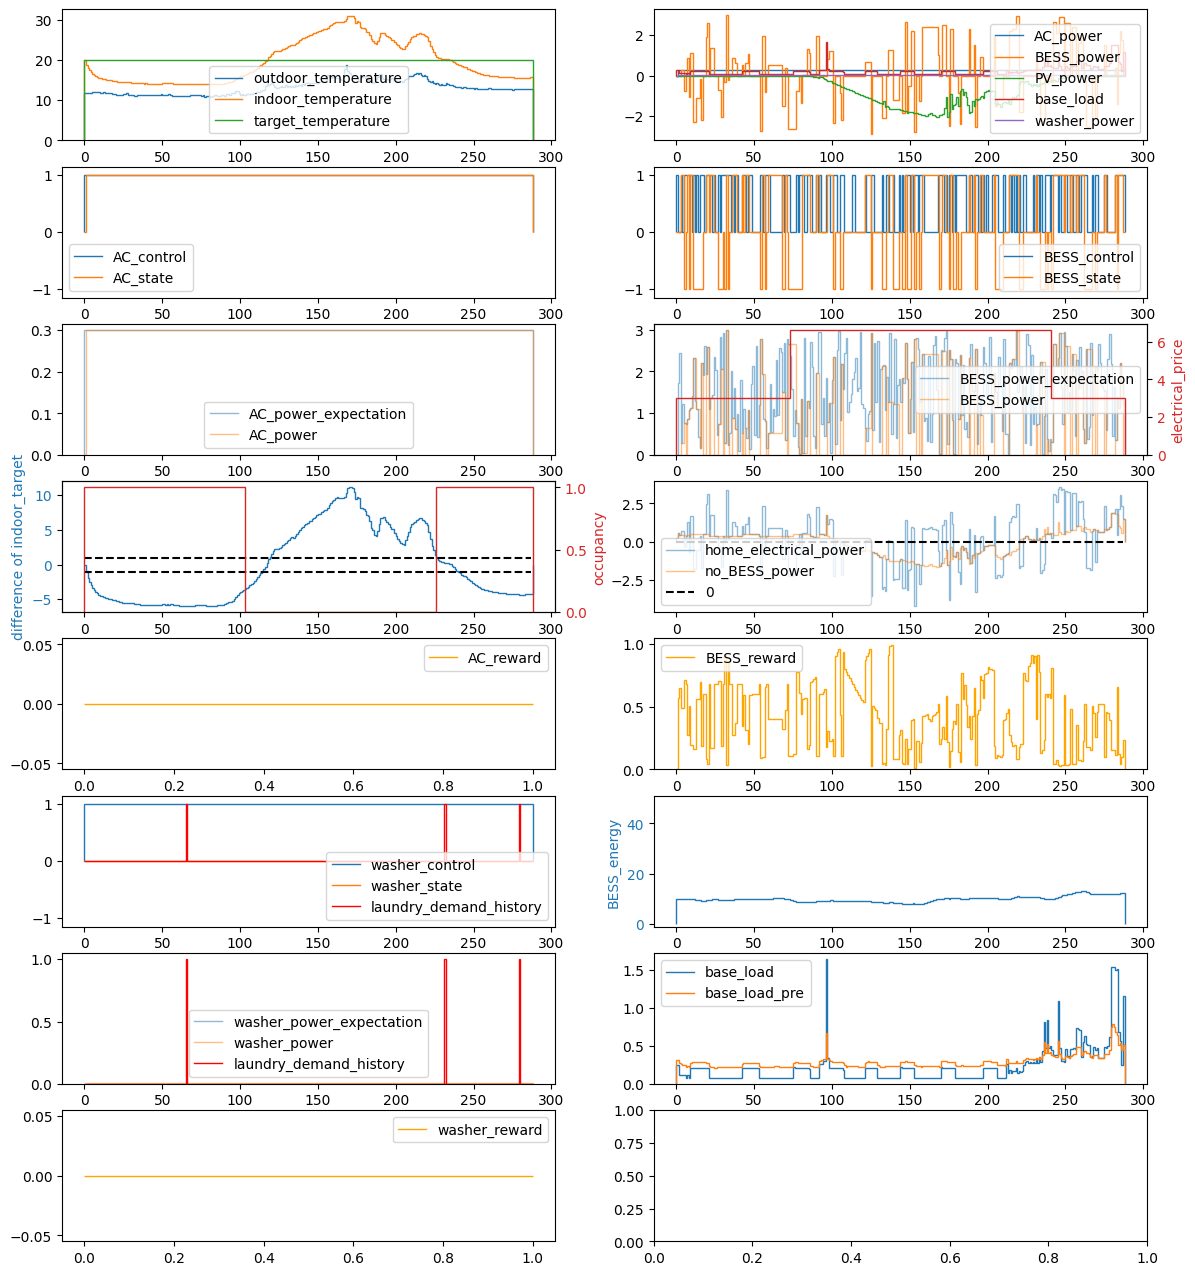

In [8]:
env = sa_env(**env_attr)
parallel_api_test(env, num_cycles=50)

renderer = Renderer(env=env.unwrapped, render_mode='episode')

for e in range(4):
    observation, infos = env.reset()
    terminations = {agent: False for agent in env.agents}
    truncations = {agent: False for agent in env.agents}
    while not any(terminations.values()) and not any(truncations.values()):
        actions = {agent: env.action_space(agent).sample() for agent in env.agents}
        print('actions')
        observation, rewards, terminations, truncations, infos = env.step(actions)
        renderer.collect()
    renderer.render()
env.close()

# Testing vec env

## sa_env

In [9]:
env = sa_env(**env_attr)
env = ss.pettingzoo_env_to_vec_env_v1(env)

print(env.observation_space, env.action_space)
renderer = Renderer(env=env.unwrapped, render_mode='episode')

for e in range(4):
    observation, infos = env.reset()
    terminations = [False]
    truncations = [False]
    while not any(terminations) and not any(truncations):
        actions = env.action_space.sample()
        actions = np.array([actions])  # 转换为符合向量环境的输入
        observation, rewards, terminations, truncations, infos = env.step(actions)
    print(
        f'observation: {observation}, rewards: {rewards}, terminations: {terminations}, truncations: {truncations}, infos: {infos}')
    print(observation.shape, actions.shape)
# renderer.render()
env.close()

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Box(0.0, 1.0, (170,), float32) Box(-1.0, 1.0, (6,), float32)
observation: [[0.500005   0.5        0.5        0.500005   0.5        0.5
  0.500001   0.50005    0.500005   0.5        0.5        0.5
  0.5        0.50000054 0.50000006 0.5000001  0.5000005  0.5
  0.5001245  0.5        0.5001245  0.5        0.5        0.500025
  0.499996   0.500052   0.50001514 0.50000054 0.500005   0.50000125
  0.499996   0.500052   0.50001514 0.500005   0.500005   0.5
  0.5        0.500005   0.5        0.5        0.500001   0.50005
  0.500005   0.5        0.5        0.5        0.5        0.50000054
  0.50000006 0.5000001  0.5000005  0.5        0.5001245  0.5
  0.5001245  0.5        0.5        0.500025   0.499996   0.500052
  0.50001514 0.50000054 0.500005   0.50000125 0.499996   0.500052
  0.50001514 0.500005   0.500005   0.5        0.5        0.500005
  0.5        0.5        0.500001   0.50005    0.500005   0.5
  0.5     

## parallel env

In [10]:
# Testing Vec env
env = parallel_env(**env_attr)
agent_num = len(env.unwrapped.possible_agents)
env = ss.pettingzoo_env_to_vec_env_v1(env)
env_num = 8
env = ss.concat_vec_envs_v1(env, env_num, num_cpus=3, base_class="stable_baselines3")

print(env.observation_space, env.action_space)
renderer = Renderer(env=env.unwrapped, render_mode='episode')

for e in range(4):
    observation = env.reset()
    dones = [False]
    while not any(dones):
        actions = env.action_space.sample()
        actions = np.array([actions] * agent_num * env_num)  # 转换为符合向量环境的输入
        obs, rewards, dones, infos = env.step(actions)
    print(
        # f'observation: {observation}, '
        # f'rewards: {rewards}, '
        # f'terminations: {dones}, '
        # f'infos: {infos}'
    )
    print(observation.shape, actions.shape)
# renderer.render()
env.close()

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Box(-100000.0, 100000.0, (34,), float32) Box(-1.0, 1.0, (6,), float32)

(24, 34) (24, 6)

(24, 34) (24, 6)

(24, 34) (24, 6)

(24, 34) (24, 6)


# Testing sa_stack_env

In [11]:
from hem.HEM_v1 import sa_stack_env

sa_stack_env(**env_attr)

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
